# LOBE on Toy Hamiltonian Example

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from src.lobe.usp import add_naive_usp
from src.lobe.coefficient_oracle import add_coefficient_oracle
from src.lobe.select_oracle import add_select_oracle
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np

In [2]:
number_of_operators = 4
operators = [(0, 0), (0, 1), (1, 0), (1, 1)]
number_of_index_qubits = 2
number_of_system_qubits = 2

term_coefficients = np.ones(number_of_operators)

In [3]:
num_qubits = 3 + number_of_index_qubits + number_of_system_qubits

In [4]:
validation = cirq.LineQubit(0)
control = cirq.LineQubit(1)
rotation = cirq.LineQubit(2)
index_register = [cirq.LineQubit(i + 3) for i in range(number_of_index_qubits)]
system_register = [cirq.LineQubit(i + 5) for i in range(number_of_system_qubits)]

In [5]:
circuit = cirq.Circuit()

circuit.append(cirq.X.on(validation))
circuit = add_naive_usp(circuit, index_register=index_register)

circuit = add_select_oracle(circuit, validation, control, index_register, system_register, operators)
circuit = add_coefficient_oracle(circuit, rotation, index_register, term_coefficients, number_of_operators)

circuit = add_naive_usp(circuit, index_register)


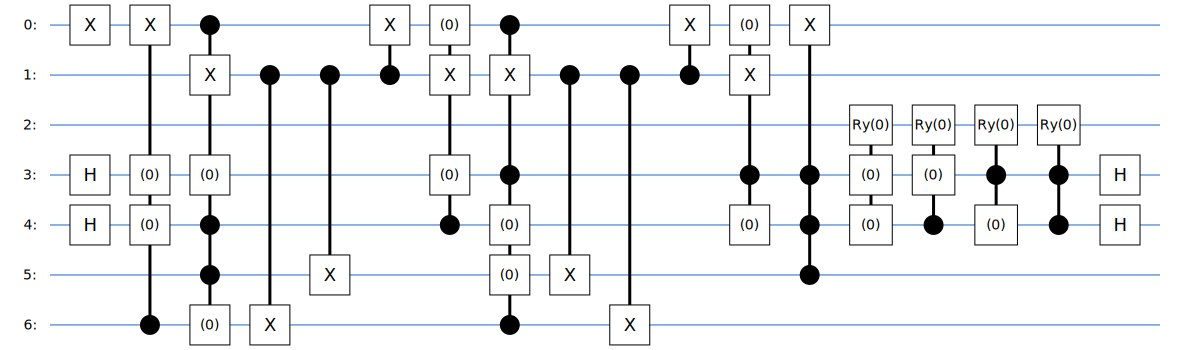

In [6]:
SVGCircuit(circuit)

In [7]:
all_registers_bar_j = np.zeros(1 << (num_qubits - number_of_system_qubits))
all_registers_bar_j[0] = 1 #|000..0> corresponds to a one in the first slot of the array

init_j = np.array([1, 0, 0, 0]) #|j> = |00>
# init_j = np.array([0, 1, 0, 0]) #|j> = |01>
#init_j = np.array([0, 0, 1, 0]) #|j> = |10>
#init_j = np.array([0, 0, 0, 1]) #|j> = |11>

initial_state = np.kron(all_registers_bar_j, init_j)

simulator = cirq.Simulator(dtype=np.complex128)
wavefunction = simulator.simulate(
            circuit,
            initial_state=initial_state
        ).final_state_vector

In [8]:
cirq.unitary(circuit)[:2**number_of_system_qubits, :2**number_of_system_qubits]

array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j]])